In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('german_credit_data.csv')

In [3]:
df

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,996,40,male,3,own,little,little,3857,30,car,good
997,997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [5]:
df.describe()

,Unnamed: 0,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


In [6]:
df['Credit amount']

0      1169
1      5951
2      2096
3      7882
4      4870
       ... 
995    1736
996    3857
997     804
998    1845
999    4576
Name: Credit amount, Length: 1000, dtype: int64

In [7]:
df.drop('Unnamed: 0',axis=1,inplace = True)

In [8]:
print('Missing values of each Columns')
df.isnull().sum()


Missing values of each Columns


Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

### Dealing with Numerical attributes


In [9]:
df_num = df.select_dtypes(include=[np.int64]).columns

### Using the histogram plot to checkfrequency ,We can see the nature of Age ,credit amount. Their distribution is skewed to right, which is not a normal distribution and which also shows that mean of these columns > median , which is also an indication that there might be an outlier which is effecting the mean, where as the central tendency of Job is at 2: skilled(mode) , which states most of the people who took credit were skilled .

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Job'}>],
       [<AxesSubplot:title={'center':'Credit amount'}>,
        <AxesSubplot:title={'center':'Duration'}>]], dtype=object)

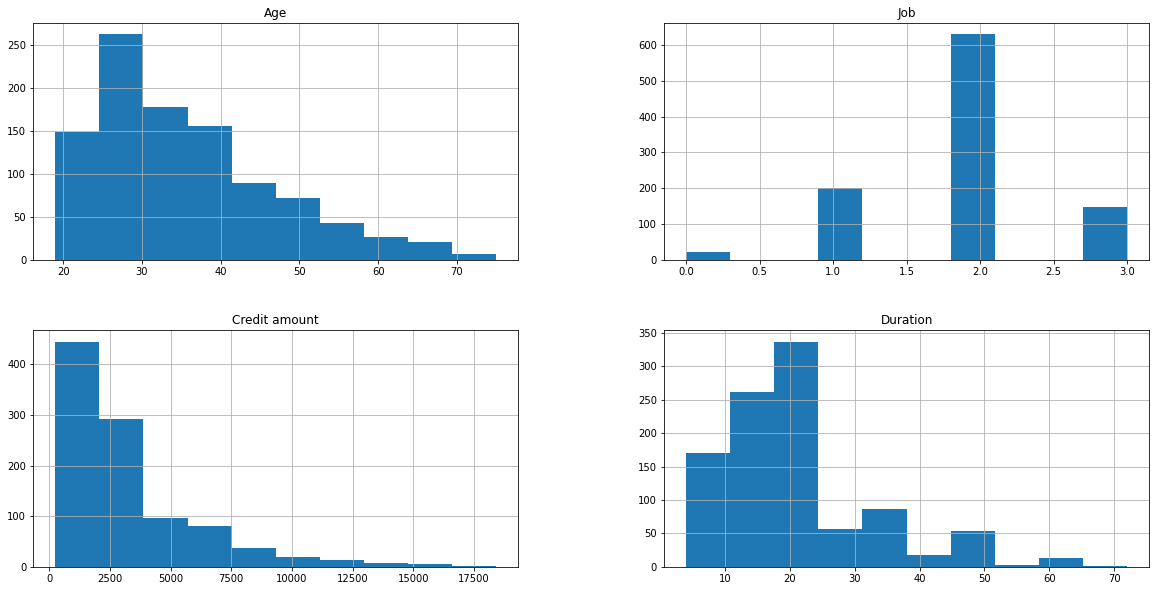

In [10]:
df[df_num].hist(figsize=(20,10))

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will resul

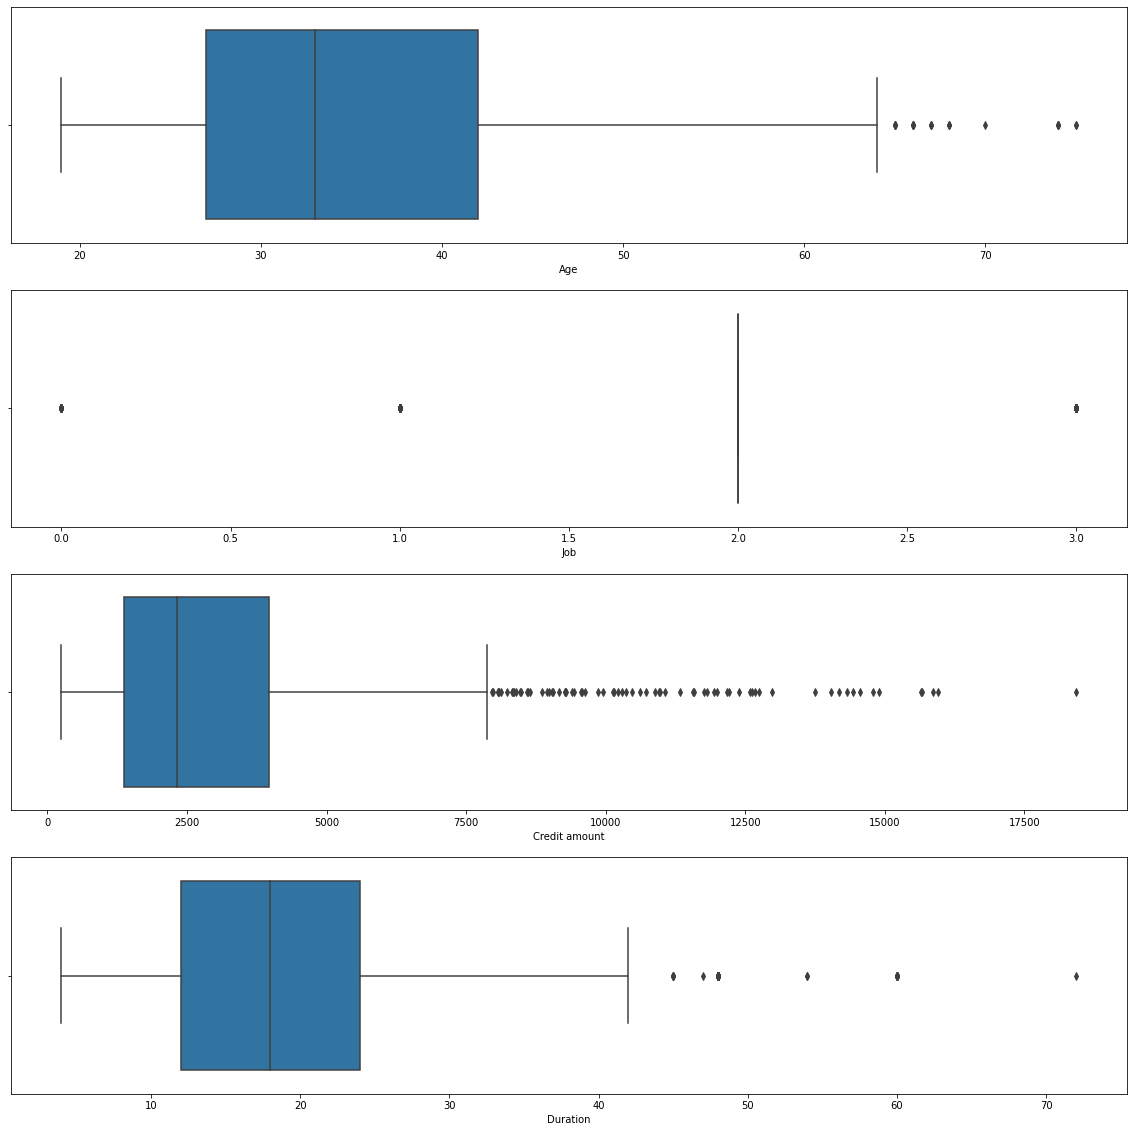

In [11]:
plt.figure(figsize=(20,20))
for value,num in enumerate(df_num):
    plt.subplot(4,1,value+1)
    sns.boxplot(df[num])

#### checking Credit amount feature

In [12]:
df_col = df.select_dtypes(include=[np.object]).columns

Text(0.5, 0, 'Sex')

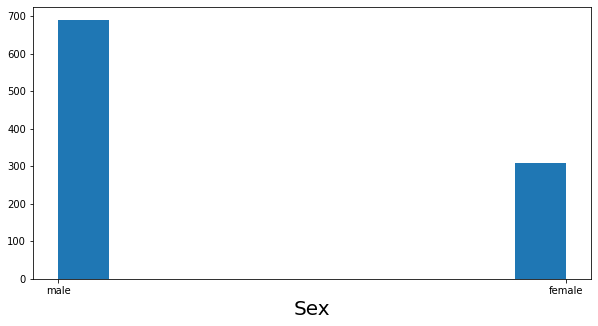

In [13]:
plt.figure(figsize=(10,5))

plt.hist(df[df_col[0]].astype(str))
plt.xlabel(df_col[0],fontsize=20)


### We can see the attribute Sex is categorical based (binary) and it shows the ratio of male is more than female who took credit since the fequency of male is more than female i.e. central tendency of this data is towards male (mode).

Text(0.5, 0, 'Housing')

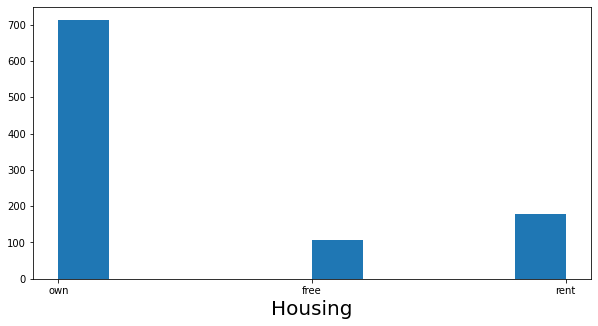

In [13]:
plt.figure(figsize=(10,5))

plt.hist(df[df_col[1]].astype(str))
plt.xlabel(df_col[1],fontsize=20)

### The attribute Housing has 3 categories , which shows people who owned houses took more credit than. The tendency of this data is towards the category 'own'

Text(0.5, 0, 'Saving accounts')

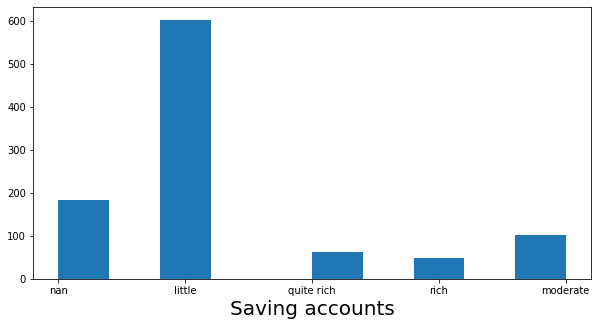

In [14]:
plt.figure(figsize=(10,5))

plt.hist(df[df_col[2]].astype(str))
plt.xlabel(df_col[2],fontsize=20)

### The attribute Saving accounts has 4 categories , which shows most people with little savings took credit .Although it has some values nan which we will deal later

Text(0.5, 0, 'Checking account')

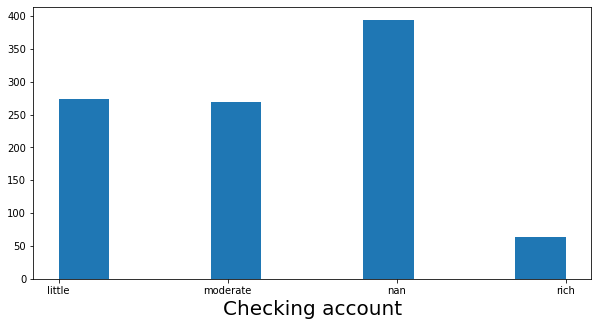

In [15]:
plt.figure(figsize=(10,5))

plt.hist(df[df_col[3]].astype(str))
plt.xlabel(df_col[3],fontsize=20)

### The attribute Checking account has 3 categories , and it more than 35% of values nan , to which I think to drop this attribute

Text(0.5, 0, 'Purpose')

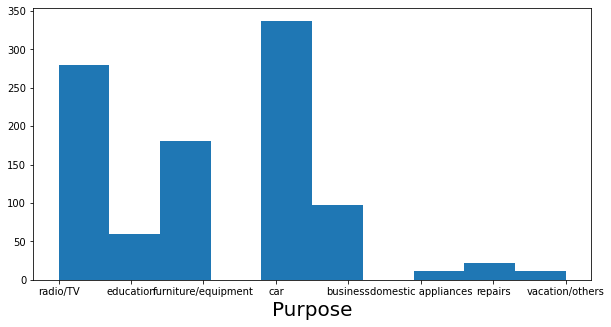

In [16]:
plt.figure(figsize=(10,5))

plt.hist(df[df_col[4]].astype(str))
plt.xlabel(df_col[4],fontsize=20)

### The purpose attribute has 8 categories , which shows most people took credit to buy car , radio/TV , furniture

In [17]:
df.Risk.value_counts()

good    700
bad     300
Name: Risk, dtype: int64

### The target class is imbalanced , with a proportion of 700(good):300(bad).


# Pre-Processing

In [18]:
x = df.copy()
x.drop('Risk',axis=1,inplace=True)


In [19]:
y = df.Risk.copy()

## Handling missing values

In [20]:
x['Saving accounts'].value_counts(normalize=True)

little        0.738066
moderate      0.126071
quite rich    0.077111
rich          0.058752
Name: Saving accounts, dtype: float64

### Saving accounts is an important attribute as an intuition(I'll see the correlation later, and almost 74% of data covers the category little , so I will replace nan values with little

In [21]:
x['Saving accounts'].fillna('little',inplace=True)

In [22]:
x['Saving accounts'].value_counts(normalize=True)


little        0.786
moderate      0.103
quite rich    0.063
rich          0.048
Name: Saving accounts, dtype: float64

In [23]:
x['Saving accounts'].describe()

count       1000
unique         4
top       little
freq         786
Name: Saving accounts, dtype: object

In [24]:
x['Checking account'].value_counts(normalize=True)

little      0.452145
moderate    0.443894
rich        0.103960
Name: Checking account, dtype: float64

In [25]:
x['Checking account'].describe()

count        606
unique         3
top       little
freq         274
Name: Checking account, dtype: object

### since the distribution of little and moderate for checking account is almost same , and the missing values are more than 30% , I'll drop this column because replacing the values here with some category will be totally uncertain

In [26]:
x.drop('Checking account',axis=1,inplace=True)

## Handling Outliers

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `di

<AxesSubplot:xlabel='Job', ylabel='Density'>

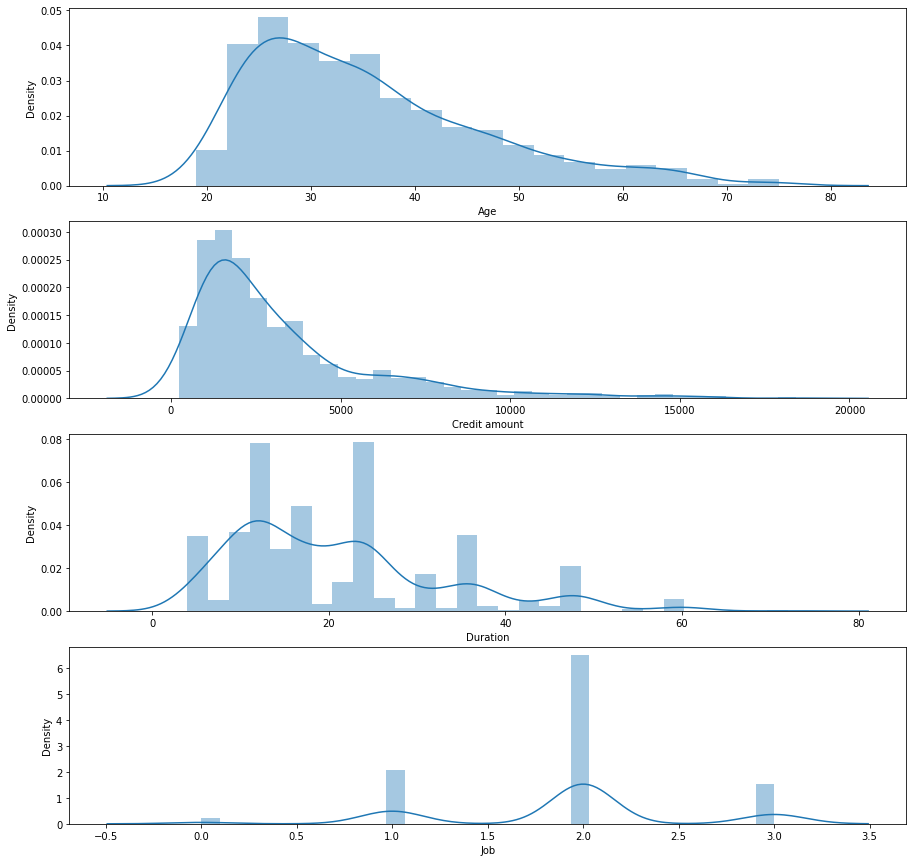

In [27]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1,figsize=(15,15))
sns.distplot(x['Age'],ax=ax1)
sns.distplot(x['Credit amount'],ax=ax2)
sns.distplot(x['Duration'],ax=ax3)
sns.distplot(x['Job'],ax=ax4)


### We wil lapply log transformation to reduce distribution and reduce the effect of  outliers.

In [28]:
nums = ['Age','Duration','Credit amount']
for i in nums:
    x[i] = np.log(x[i])

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `di

<AxesSubplot:xlabel='Job', ylabel='Density'>

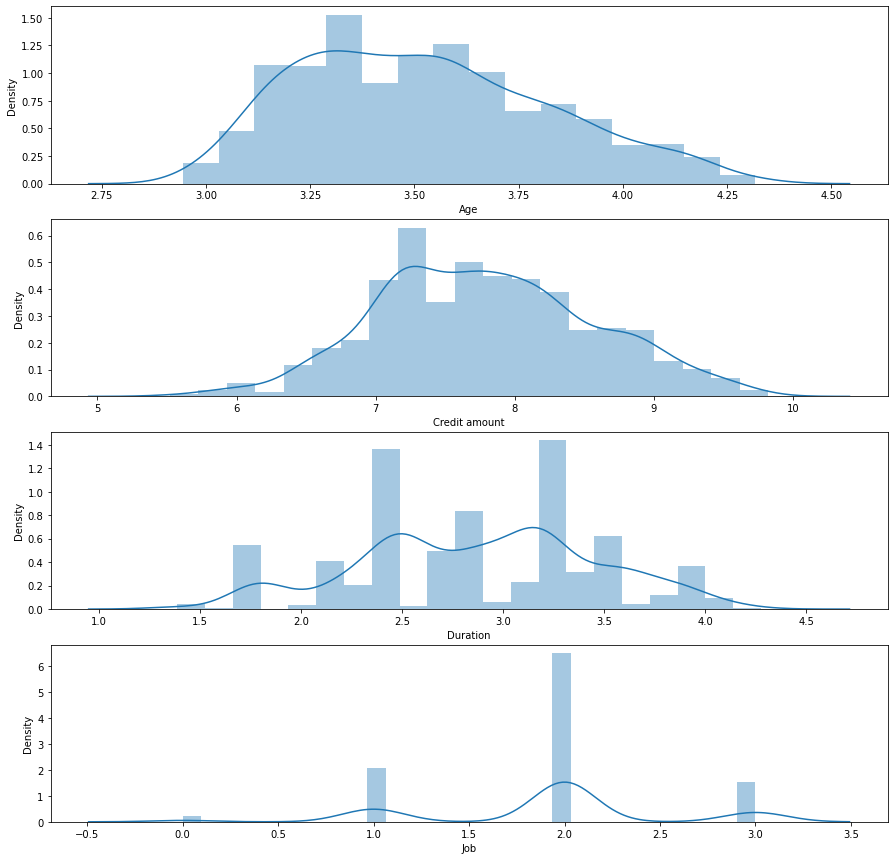

In [29]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1,figsize=(15,15))
sns.distplot(x['Age'],ax=ax1)
sns.distplot(x['Credit amount'],ax=ax2)
sns.distplot(x['Duration'],ax=ax3)
sns.distplot(x['Job'],ax=ax4)

## Label encoding

In [30]:
x_col = x.select_dtypes(include=[np.object]).columns
x_col

Index(['Sex', 'Housing', 'Saving accounts', 'Purpose'], dtype='object')

In [31]:
le = LabelEncoder()

In [32]:
for i in x_col:
    x[i] = le.fit_transform(x[i])

In [33]:
y = pd.DataFrame(le.fit_transform(y),columns=['Risk'])

In [34]:
a = x.copy()
a['Risk'] = y['Risk']

<AxesSubplot:>

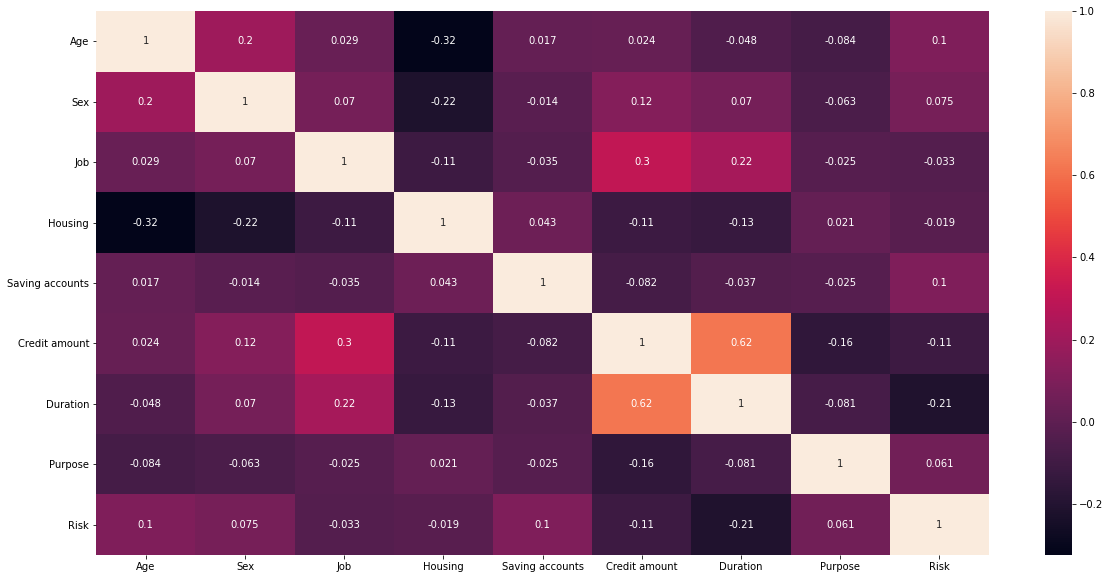

In [35]:
plt.figure(figsize=(20,10))
sns.heatmap(a.corr(),annot=True)

### we can see that the attributes Saving accounts , Credit amount, Age and Duration has best correlation with the target variable Risk

In [36]:
x = x.values

In [37]:
y = y.values
y = np.reshape(y,(len(y)))

In [38]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report , precision_score , recall_score , f1_score
from sklearn.metrics import roc_auc_score,roc_curve

In [40]:
penalty='l2'
c=1.0
solver = 'liblinear'
lr = LogisticRegression(penalty=penalty,C=c,solver=solver)
model_lr = lr.fit(x_train,y_train)
predictions_lr = model_lr.predict(x_test)
print('Classification report for logistic Regression with parameters: \n\n'+'penalty: '+str(penalty)+'  C : '+str(c)+'\n\n',classification_report(y_test,predictions_lr))
print('Accuracy Score: ',accuracy_score(y_test,predictions_lr))

Classification report for logistic Regression with parameters: 

penalty: l2  C : 1.0

               precision    recall  f1-score   support

           0       0.58      0.21      0.31        71
           1       0.75      0.94      0.83       179

    accuracy                           0.73       250
   macro avg       0.66      0.57      0.57       250
weighted avg       0.70      0.73      0.68       250

Accuracy Score:  0.732


In [41]:
penalty='l1'
c=0.5
solver = 'liblinear'
lr = LogisticRegression(penalty=penalty,C=c,solver=solver)
model_lr = lr.fit(x_train,y_train)
predictions_lr = model_lr.predict(x_test)
print('Classification report for logistic Regression with parameters: \n\n'+'penalty: '+str(penalty)+'  C : '+str(c)+'\n\n',classification_report(y_test,predictions_lr))
print('Accuracy Score: ',accuracy_score(y_test,predictions_lr))

Classification report for logistic Regression with parameters: 

penalty: l1  C : 0.5

               precision    recall  f1-score   support

           0       0.65      0.18      0.29        71
           1       0.75      0.96      0.84       179

    accuracy                           0.74       250
   macro avg       0.70      0.57      0.56       250
weighted avg       0.72      0.74      0.68       250

Accuracy Score:  0.74


In [42]:
penalty='l2'
c=0.5
solver = 'liblinear'
lr = LogisticRegression(penalty=penalty,C=c,solver=solver)
model_lr = lr.fit(x_train,y_train)
predictions_lr = model_lr.predict(x_test)
print('Classification report for logistic Regression with parameters: \n\n'+'penalty: '+str(penalty)+'  C : '+str(c)+'\n\n',classification_report(y_test,predictions_lr))
print('Accuracy Score: ',accuracy_score(y_test,predictions_lr))

Classification report for logistic Regression with parameters: 

penalty: l2  C : 0.5

               precision    recall  f1-score   support

           0       0.58      0.20      0.29        71
           1       0.75      0.94      0.83       179

    accuracy                           0.73       250
   macro avg       0.67      0.57      0.56       250
weighted avg       0.70      0.73      0.68       250

Accuracy Score:  0.732


In [43]:
penalty='l1'
c=1.0
solver = 'liblinear'
lr = LogisticRegression(penalty=penalty,C=c,solver=solver)
model_lr = lr.fit(x_train,y_train)
predictions_lr = model_lr.predict(x_test)
print('Classification report for logistic Regression with parameters: \n\n'+'penalty: '+str(penalty)+'  C : '+str(c)+'\n\n',classification_report(y_test,predictions_lr))
print('Accuracy Score: ',accuracy_score(y_test,predictions_lr))

Classification report for logistic Regression with parameters: 

penalty: l1  C : 1.0

               precision    recall  f1-score   support

           0       0.60      0.21      0.31        71
           1       0.75      0.94      0.84       179

    accuracy                           0.74       250
   macro avg       0.68      0.58      0.57       250
weighted avg       0.71      0.74      0.69       250

Accuracy Score:  0.736


In [44]:
penalty='l1'
c=1.0
solver = 'liblinear'
lr = LogisticRegression(penalty=penalty,C=c,solver=solver)
model_lr = lr.fit(x_train,y_train)
predictions_lr = model_lr.predict(x_test)
print('Classification report for logistic Regression with parameters: \n\n'+'penalty: '+str(penalty)+'  C : '+str(c)+'\n\n',classification_report(y_test,predictions_lr))
print('Accuracy Score: ',accuracy_score(y_test,predictions_lr))

Classification report for logistic Regression with parameters: 

penalty: l1  C : 1.0

               precision    recall  f1-score   support

           0       0.60      0.21      0.31        71
           1       0.75      0.94      0.84       179

    accuracy                           0.74       250
   macro avg       0.68      0.58      0.57       250
weighted avg       0.71      0.74      0.69       250

Accuracy Score:  0.736


### I will use penalty : l2 and c = 1.0 , by observing the recall and f1 score more for 0th class, i.e Risk was bad . I don't want to predict the bad Risk as good as it can have a bad impact.

In [45]:
penalty='l2'
c=1.0
solver = 'liblinear'
lr = LogisticRegression(penalty=penalty,C=c,solver=solver)
model_lr = lr.fit(x_train,y_train)
predictions_lr = model_lr.predict(x_test)
print('Classification report for logistic Regression with parameters: \n\n'+'penalty: '+str(penalty)+'  C : '+str(c)+'\n\n',classification_report(y_test,predictions_lr))
print('Accuracy Score: ',accuracy_score(y_test,predictions_lr))

Classification report for logistic Regression with parameters: 

penalty: l2  C : 1.0

               precision    recall  f1-score   support

           0       0.58      0.21      0.31        71
           1       0.75      0.94      0.83       179

    accuracy                           0.73       250
   macro avg       0.66      0.57      0.57       250
weighted avg       0.70      0.73      0.68       250

Accuracy Score:  0.732


Text(0.5, 1.0, 'CONFUSION MATRIX FOR LOGISTIC REGRESSION')

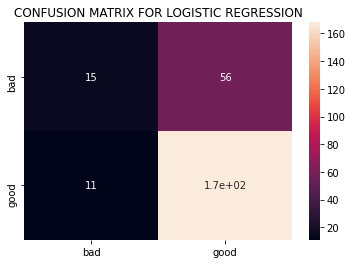

In [46]:
confusion_matrix_lr = confusion_matrix(y_test,predictions_lr)
sns.heatmap(confusion_matrix_lr,annot=True,xticklabels=['bad','good'],yticklabels=['bad','good'])
plt.title('CONFUSION MATRIX FOR LOGISTIC REGRESSION')

Area under curve :  0.5749075458336612


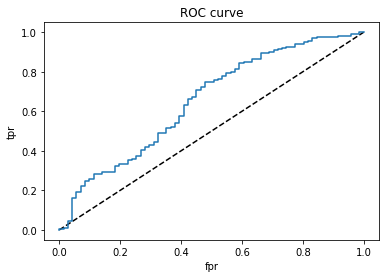

In [47]:
model_roc_auc = roc_auc_score(y_test,predictions_lr) 
y_pred_prob = model_lr.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Logistic Regression')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
print ("Area under curve : ",model_roc_auc)
plt.show()

In [48]:
from sklearn.neighbors import KNeighborsClassifier

In [49]:
neighbours = [3,5,7]
metrics = ['euclidean','manhattan','minkowski']

for n in neighbours:
    for m in metrics:
        knn = KNeighborsClassifier(n_neighbors=n,metric=m)
        model_knn = knn.fit(x_train,y_train)
        predictions_knn = model_knn.predict(x_test)
        print('\n\nClassification report for KNN with parameters, \n\n'+'neighbors: '+str(n)+'  metric : '+str(m)+'\n\n',classification_report(y_test,predictions_knn))
        print('Accuracy Score: ',accuracy_score(y_test,predictions_knn))



Classification report for KNN with parameters, 

neighbors: 3  metric : euclidean

               precision    recall  f1-score   support

           0       0.32      0.27      0.29        71
           1       0.73      0.77      0.75       179

    accuracy                           0.63       250
   macro avg       0.52      0.52      0.52       250
weighted avg       0.61      0.63      0.62       250

Accuracy Score:  0.628


Classification report for KNN with parameters, 

neighbors: 3  metric : manhattan

               precision    recall  f1-score   support

           0       0.35      0.30      0.32        71
           1       0.74      0.78      0.76       179

    accuracy                           0.64       250
   macro avg       0.54      0.54      0.54       250
weighted avg       0.63      0.64      0.63       250

Accuracy Score:  0.644


Classification report for KNN with parameters, 

neighbors: 3  metric : minkowski

               precision    recall  f1-scor

### I will use the parameters for KNN , neighbors: 3  metric : manhattan

In [50]:
knn = KNeighborsClassifier(n_neighbors=3,metric='manhattan')
model_knn = knn.fit(x_train,y_train)

In [51]:
predictions_knn = model_knn.predict(x_test)
print('Classification report for KNN: \n\n',classification_report(y_test,predictions_knn))
print('Accuracy Score: ',accuracy_score(y_test,predictions_knn))

Classification report for KNN: 

               precision    recall  f1-score   support

           0       0.35      0.30      0.32        71
           1       0.74      0.78      0.76       179

    accuracy                           0.64       250
   macro avg       0.54      0.54      0.54       250
weighted avg       0.63      0.64      0.63       250

Accuracy Score:  0.644


Text(0.5, 1.0, 'CONFUSION MATRIX FOR KNN')

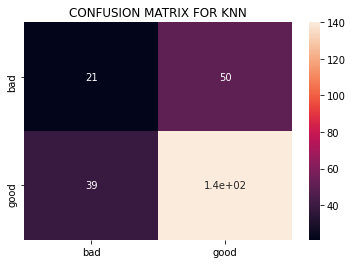

In [52]:
confusion_matrix_knn = confusion_matrix(y_test,predictions_knn)
sns.heatmap(confusion_matrix_knn,annot=True,xticklabels=['bad','good'],yticklabels=['bad','good'])
plt.title('CONFUSION MATRIX FOR KNN')

Area under curve :  0.5389487764576284


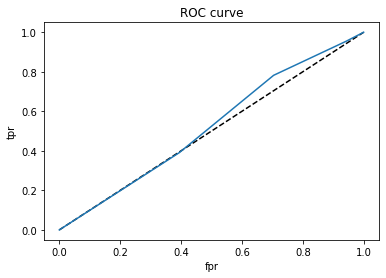

In [53]:
model_roc_auc = roc_auc_score(y_test,predictions_knn) 
y_pred_prob = model_knn.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='KNN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
print ("Area under curve : ",model_roc_auc)
plt.show()

In [54]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [55]:
criterion = ['gini','entropy']
max_depth = [3,5,7,9]
for c in criterion:
    for m in max_depth:
        treeclf = DecisionTreeClassifier(criterion=c,max_depth=m)
        model_tree = treeclf.fit(x_train,y_train)
        predictions_tree = model_tree.predict(x_test)
        print('\n\nClassification report for Desicion Tree with parameters, \n\n'+'criterion: '+str(c)+'  max_depth : '+str(m)+'\n\n',classification_report(y_test,predictions_tree))
        print('Accuracy Score: ',accuracy_score(y_test,predictions_tree))



Classification report for Desicion Tree with parameters, 

criterion: gini  max_depth : 3

               precision    recall  f1-score   support

           0       0.44      0.20      0.27        71
           1       0.74      0.90      0.81       179

    accuracy                           0.70       250
   macro avg       0.59      0.55      0.54       250
weighted avg       0.65      0.70      0.66       250

Accuracy Score:  0.7


Classification report for Desicion Tree with parameters, 

criterion: gini  max_depth : 5

               precision    recall  f1-score   support

           0       0.32      0.13      0.18        71
           1       0.72      0.89      0.80       179

    accuracy                           0.68       250
   macro avg       0.52      0.51      0.49       250
weighted avg       0.61      0.68      0.62       250

Accuracy Score:  0.676


Classification report for Desicion Tree with parameters, 

criterion: gini  max_depth : 7

               precis

### I will use Decision Tree with following paramets, criterion: gini  max_depth : 9

In [65]:
treeclf = DecisionTreeClassifier(criterion='gini',max_depth=9)

In [66]:
model_tree = treeclf.fit(x_train,y_train)

In [67]:
predictions_tree = model_tree.predict(x_test)
print('Classification report for Desicion Tree: \n\n',classification_report(y_test,predictions_tree))
print('Accuracy Score: ',accuracy_score(y_test,predictions_tree))

Classification report for Desicion Tree: 

               precision    recall  f1-score   support

           0       0.38      0.34      0.36        71
           1       0.75      0.78      0.77       179

    accuracy                           0.66       250
   macro avg       0.56      0.56      0.56       250
weighted avg       0.64      0.66      0.65       250

Accuracy Score:  0.656


Text(0.5, 1.0, 'CONFUSION MATRIX FOR Decision Tree')

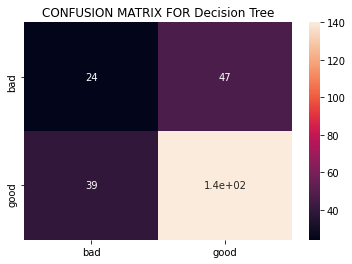

In [68]:
confusion_matrix_knn = confusion_matrix(y_test,predictions_tree)
sns.heatmap(confusion_matrix_knn,annot=True,xticklabels=['bad','good'],yticklabels=['bad','good'])
plt.title('CONFUSION MATRIX FOR Decision Tree')

Area under curve :  0.5600755370210087


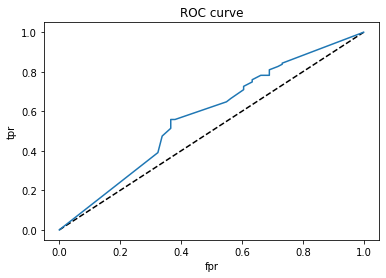

In [69]:
model_roc_auc = roc_auc_score(y_test,predictions_tree) 
y_pred_prob = model_tree.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Decision Tree')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
print ("Area under curve : ",model_roc_auc)
plt.show()

In [70]:
from sklearn.naive_bayes import GaussianNB , BernoulliNB , MultinomialNB

In [71]:
model_NB = GaussianNB().fit(x_train,y_train)
predictions_NB = model_NB.predict(x_test)
print('Classification report for Gaussian Naive Bayes: \n\n',classification_report(y_test,predictions_NB))
print('Accuracy Score: ',accuracy_score(y_test,predictions_NB))

Classification report for Gaussian Naive Bayes: 

               precision    recall  f1-score   support

           0       0.43      0.38      0.40        71
           1       0.76      0.80      0.78       179

    accuracy                           0.68       250
   macro avg       0.60      0.59      0.59       250
weighted avg       0.67      0.68      0.67       250

Accuracy Score:  0.68


In [72]:
model_NB = BernoulliNB().fit(x_train,y_train)
predictions_NB = model_NB.predict(x_test)
print('Classification report for Bernoulli Naive Bayes: \n\n',classification_report(y_test,predictions_NB))
print('Accuracy Score: ',accuracy_score(y_test,predictions_NB))

Classification report for Bernoulli Naive Bayes: 

               precision    recall  f1-score   support

           0       1.00      0.03      0.05        71
           1       0.72      1.00      0.84       179

    accuracy                           0.72       250
   macro avg       0.86      0.51      0.45       250
weighted avg       0.80      0.72      0.62       250

Accuracy Score:  0.724


### I Will use GaussianNB 

Text(0.5, 1.0, 'CONFUSION MATRIX FOR Naive Bayes')

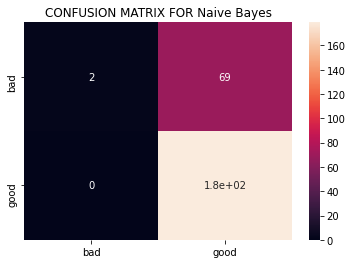

In [73]:
confusion_matrix_NB = confusion_matrix(y_test,predictions_NB)
sns.heatmap(confusion_matrix_NB,annot=True,xticklabels=['bad','good'],yticklabels=['bad','good'])
plt.title('CONFUSION MATRIX FOR Naive Bayes')

Area under curve :  0.5140845070422535


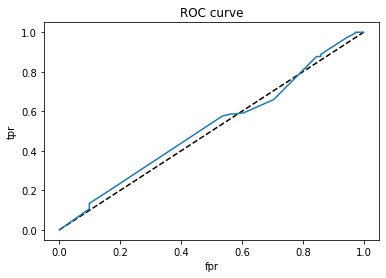

In [74]:
model_roc_auc = roc_auc_score(y_test,predictions_NB) 
y_pred_prob = model_NB.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Naive Bayes')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
print ("Area under curve : ",model_roc_auc)
plt.show()

In [75]:
from sklearn.ensemble import RandomForestClassifier

In [76]:
n_estimators = [100,200,250,300]
for n in n_estimators:
    model_RF = RandomForestClassifier(n_estimators=200).fit(x_train,y_train)
    predictions_RF = model_RF.predict(x_test)
    print('\n\nClassification report for Random Forest with parameters, \n\n'+'n_estimators: '+str(n)+'\n\n',classification_report(y_test,predictions_RF))
    print('Accuracy Score: ',accuracy_score(y_test,predictions_RF))



Classification report for Random Forest with parameters, 

n_estimators: 100

               precision    recall  f1-score   support

           0       0.45      0.24      0.31        71
           1       0.75      0.88      0.81       179

    accuracy                           0.70       250
   macro avg       0.60      0.56      0.56       250
weighted avg       0.66      0.70      0.67       250

Accuracy Score:  0.7


Classification report for Random Forest with parameters, 

n_estimators: 200

               precision    recall  f1-score   support

           0       0.46      0.24      0.31        71
           1       0.75      0.89      0.81       179

    accuracy                           0.70       250
   macro avg       0.60      0.56      0.56       250
weighted avg       0.66      0.70      0.67       250

Accuracy Score:  0.704


Classification report for Random Forest with parameters, 

n_estimators: 250

               precision    recall  f1-score   support

    

### I will use number of estimates = 250

In [77]:
model_RF = RandomForestClassifier(n_estimators=300).fit(x_train,y_train)

In [78]:
predictions_RF = model_RF.predict(x_test)
print('Classification report for Random Forest: \n\n',classification_report(y_test,predictions_RF))
print('Accuracy Score: ',accuracy_score(y_test,predictions_RF))

Classification report for Random Forest: 

               precision    recall  f1-score   support

           0       0.47      0.24      0.32        71
           1       0.75      0.89      0.81       179

    accuracy                           0.71       250
   macro avg       0.61      0.57      0.57       250
weighted avg       0.67      0.71      0.67       250

Accuracy Score:  0.708


Text(0.5, 1.0, 'CONFUSION MATRIX FOR Random Forest')

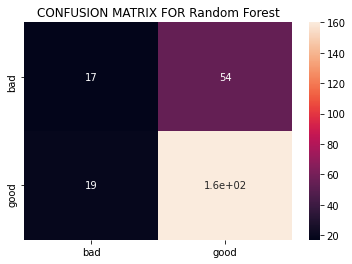

In [79]:
confusion_matrix_RF = confusion_matrix(y_test,predictions_RF)
sns.heatmap(confusion_matrix_RF,annot=True,xticklabels=['bad','good'],yticklabels=['bad','good'])
plt.title('CONFUSION MATRIX FOR Random Forest')

Area under curve :  0.5666456841608309


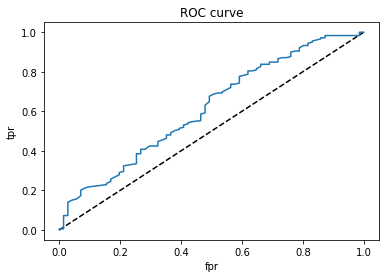

In [80]:
model_roc_auc = roc_auc_score(y_test,predictions_RF) 
y_pred_prob = model_RF.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Random Forest')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
print ("Area under curve : ",model_roc_auc)
plt.show()

In [81]:
from sklearn.ensemble import AdaBoostClassifier
model_AB = AdaBoostClassifier().fit(x_train, y_train)

In [82]:
predictions_AB = model_AB.predict(x_test)
print('Classification report for AdaBoost: \n\n',classification_report(y_test,predictions_AB))
print('Accuracy Score: ',accuracy_score(y_test,predictions_AB))

Classification report for AdaBoost: 

               precision    recall  f1-score   support

           0       0.51      0.31      0.39        71
           1       0.76      0.88      0.82       179

    accuracy                           0.72       250
   macro avg       0.64      0.60      0.60       250
weighted avg       0.69      0.72      0.70       250

Accuracy Score:  0.72


Text(0.5, 1.0, 'CONFUSION MATRIX FOR AdaBoost')

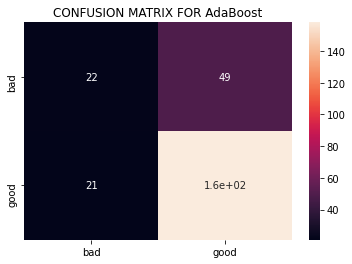

In [83]:
confusion_matrix_AB = confusion_matrix(y_test,predictions_AB)
sns.heatmap(confusion_matrix_AB,annot=True,xticklabels=['bad','good'],yticklabels=['bad','good'])
plt.title('CONFUSION MATRIX FOR AdaBoost')

Area under curve :  0.5962703595876937


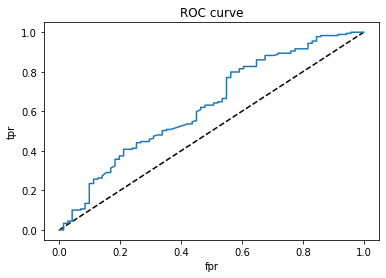

In [84]:
model_roc_auc = roc_auc_score(y_test,predictions_AB) 
y_pred_prob = model_AB.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Ada Boost')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
print ("Area under curve : ",model_roc_auc)
plt.show()

In [85]:
from sklearn.ensemble import GradientBoostingClassifier

In [86]:
model_XG = GradientBoostingClassifier().fit(x_train,y_train)

In [87]:
predictions_XG = model_XG.predict(x_test)
print('Classification report for XGBoost: \n\n',classification_report(y_test,predictions_XG))
print('Accuracy Score: ',accuracy_score(y_test,predictions_XG))

Classification report for XGBoost: 

               precision    recall  f1-score   support

           0       0.48      0.18      0.27        71
           1       0.74      0.92      0.82       179

    accuracy                           0.71       250
   macro avg       0.61      0.55      0.54       250
weighted avg       0.67      0.71      0.66       250

Accuracy Score:  0.712


Text(0.5, 1.0, 'CONFUSION MATRIX FOR XGBoost')

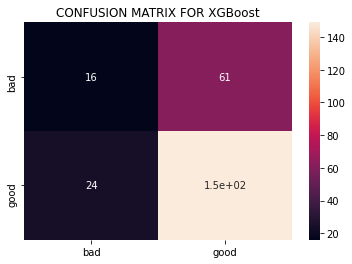

In [315]:
confusion_matrix_XG = confusion_matrix(y_test,predictions_XG)
sns.heatmap(confusion_matrix_XG,annot=True,xticklabels=['bad','good'],yticklabels=['bad','good'])
plt.title('CONFUSION MATRIX FOR XGBoost')

Area under curve :  0.5345319420463929


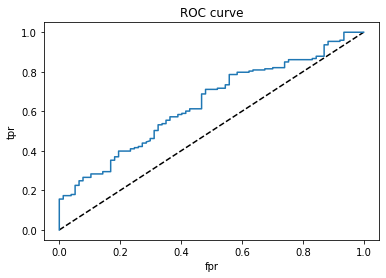

In [316]:
model_roc_auc = roc_auc_score(y_test,predictions_XG) 
y_pred_prob = model_XG.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='XGBoost')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
print ("Area under curve : ",model_roc_auc)
plt.show()

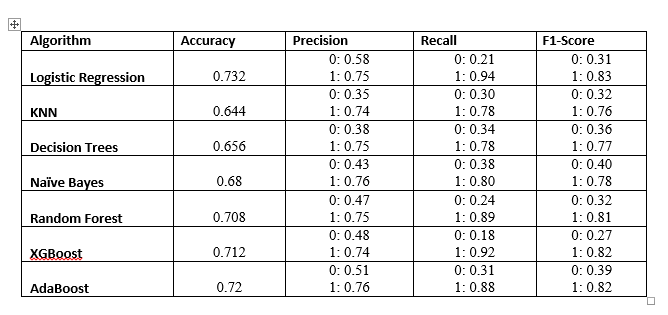